In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
data = pd.concat([train, test])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 364
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

## 分離目標

In [5]:
target = data.SalePrice
data = data.select_dtypes(include=['int64','float64']).drop(columns=['Id', 'MSSubClass'])

In [6]:
LotFrontage = data.LotFrontage
GarageYrBlt = data.GarageYrBlt
MasVnrArea = data.MasVnrArea

## 繪圖

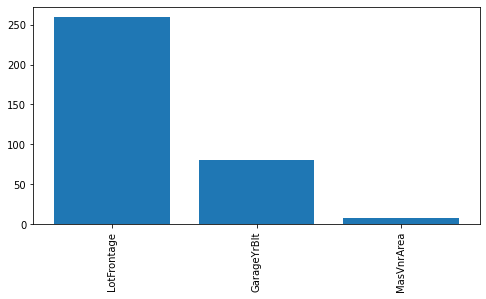

In [7]:
missing = data.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending = False)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

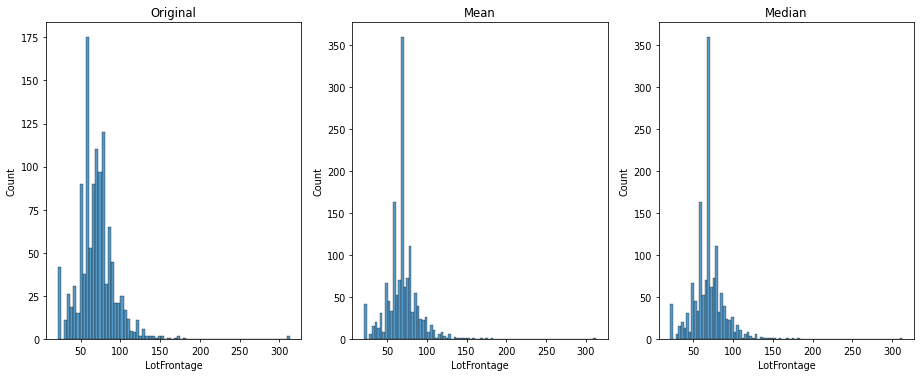

In [8]:
LotFrontage_mean = data.LotFrontage.fillna(data.LotFrontage.mean())
LotFrontage_median = data.LotFrontage.fillna(data.LotFrontage.median())

plt.figure(figsize = (16, 6), dpi = 70)

plt.subplot(1, 3, 1, title = 'Original')
sns.histplot(LotFrontage)

plt.subplot(1, 3, 2, title = 'Mean')
sns.histplot(LotFrontage_mean)

plt.subplot(1, 3, 3, title = 'Median')
sns.histplot(LotFrontage_median)

plt.show()

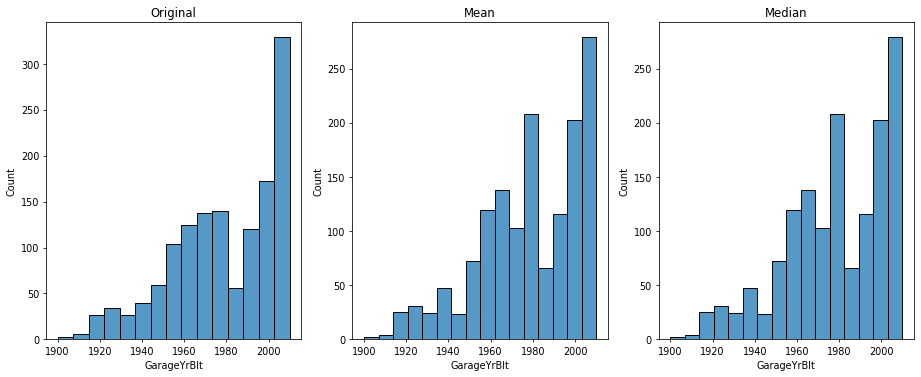

In [9]:
GarageYrBlt_mean = data.GarageYrBlt.fillna(data.GarageYrBlt.mean())
GarageYrBlt_median = data.GarageYrBlt.fillna(data.GarageYrBlt.median())

plt.figure(figsize = (16, 6), dpi = 70)

plt.subplot(1, 3, 1, title = 'Original')
sns.histplot(GarageYrBlt)

plt.subplot(1, 3, 2, title = 'Mean')
sns.histplot(GarageYrBlt_mean)

plt.subplot(1, 3, 3, title = 'Median')
sns.histplot(GarageYrBlt_median)

plt.show()

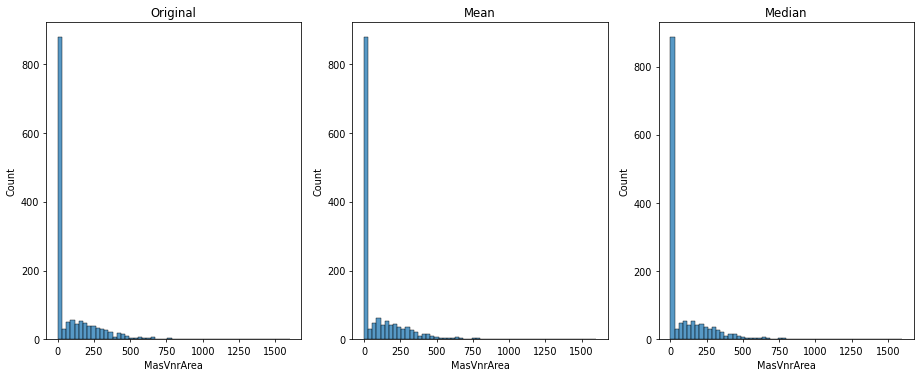

In [10]:
MasVnrArea_mean = data.MasVnrArea.fillna(data.MasVnrArea.mean())
MasVnrArea_median = data.MasVnrArea.fillna(data.MasVnrArea.median())

plt.figure(figsize = (16, 6), dpi = 70)

plt.subplot(1, 3, 1, title = 'Original')
sns.histplot(MasVnrArea)

plt.subplot(1, 3, 2, title = 'Mean')
sns.histplot(MasVnrArea_mean)

plt.subplot(1, 3, 3, title = 'Median')
sns.histplot(MasVnrArea_median)

plt.show()

## 分析標準差

In [11]:
print(f'The std of LotFrontage : {LotFrontage.std()}\
\n(fill na with mean) : {LotFrontage_mean.std()} \
\n(fill na with median) : {LotFrontage_median.std()}')

print(f'\nThe std of GarageYrBlt : {GarageYrBlt.std()}\
\n(fill na with mean) : {GarageYrBlt_mean.std()} \
\n(fill na with median) : {GarageYrBlt_median.std()}')

print(f'\nThe std of MasVnrArea : {MasVnrArea.std()}\
\n(fill na with mean) : {MasVnrArea_mean.std()} \
\n(fill na with median) : {MasVnrArea_median.std()}')

The std of LotFrontage : 24.28475177448317
(fill na with mean) : 22.02402268870693 
(fill na with median) : 22.027677088952437

The std of GarageYrBlt : 24.689724768590203
(fill na with mean) : 23.994583259057613 
(fill na with median) : 23.997021528934187

The std of MasVnrArea : 181.06620658721764
(fill na with mean) : 180.5691124259731 
(fill na with median) : 180.73137335812245


## 透過分析標準差可以得到什麼結果？
可以知道藉由不同方式的補值資料的分布會呈現甚麼樣子，但這三個變數用中位數和平均數補值後標準差都差不多，沒有太多的變化，若是有極值時平均數會較容易受影響，標準差也容易較大。